In [5]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from google.colab import drive
drive.mount('/content/drive/')


F1: 0.7143
Время обучения: 0.06


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:57:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [4]:
df = pd.read_csv("diabetes.csv")

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

depths = range(1, 30)
f1_scores_depth = []

for d in depths:
    clf = RandomForestClassifier(max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores_depth.append(f1_score(y_test, y_pred))

plt.plot(depths, f1_scores_depth, marker='o')
plt.xlabel("Глубина деревьев")
plt.ylabel("F1")
plt.grid()
plt.show()

Mounted at /content/drive/
F1: 0.7143
Время обучения: 0.14


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:54:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


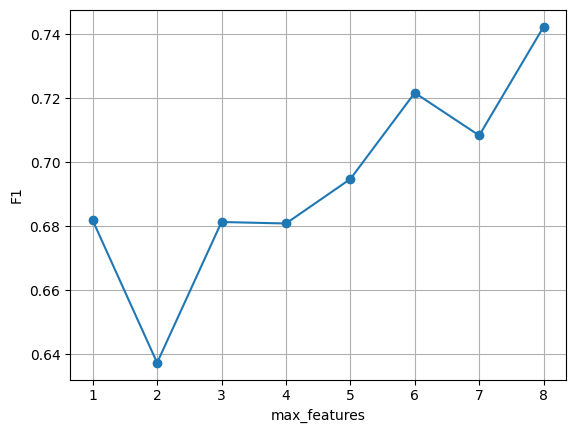

In [6]:
features_range = range(1, X.shape[1] + 1)
f1score_features = []

for mf in features_range:
    clf = RandomForestClassifier(max_features=mf, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1score_features.append(f1_score(y_test, y_pred))

plt.plot(features_range, f1score_features, marker='o')
plt.xlabel("max_features")
plt.ylabel("F1")
plt.grid()
plt.show()


In [ ]:
tree_counts = [10, 20,50,75, 100, 150, 200,500]
f1score_trees = []
time_ = []

for n in tree_counts:
    clf = RandomForestClassifier(n_estimators=n, random_state=0)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()

    y_pred = clf.predict(X_test)
    f1score_trees.append(f1_score(y_test, y_pred))
    time_.append(end - start)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(tree_counts, f1score_trees, marker='o')
plt.xlabel("Кол-во деревьев")
plt.ylabel("F1")
plt.grid()

plt.subplot(1,2,2)
plt.plot(tree_counts, time_, marker='o', color='orange')
plt.xlabel("Кол-во деревьев")
plt.ylabel("Время")
plt.grid()
plt.show()

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=100, use_label_encoder=False,eval_metric="logloss")

start = time.time()
xgb_model.fit(X_train, y_train)
end = time.time()

y_pred_xgb = xgb_model.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb)
xgb_time = end - start

print(f"F1: {f1_xgb:.4f}")
print(f"Время обучения: {xgb_time:.2f}")

In [ ]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=4, random_state=42)
start_rf = time.time()
best_rf.fit(X_train_scaled, y_train)
end_rf = time.time()

y_pred_rf = best_rf.predict(X_test_scaled)
f1_rf = f1_score(y_test, y_pred_rf)
rf_time = end_rf - start_rf

print("Сравнение моделей:")
print(f"Random Forest - F1: {f1_rf:.4f}, время: {rf_time:.2f} ")
print(f"XGBoost       - F1: {f1_xgb:.4f}, время: {xgb_time:.2f} ")